## MP Phase 1

**S11 - Group x**

**Submitted By:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**Chua Ching, Janine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Ileto, Maxine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Dytoc, Ayisha**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Tan, Jared**

# Introduction

## Target Task

In sports, soccer remains to be one of the world's most popular sports. Accurately predicting match results is a pursuit that intrigues both enthusiasts, analysts, and even the casual audience. The dataset under consideration provides a unique opportunity to explore this problem by focusing on the **classification task of determining whether the home team is winning or not given a set of features**.

This classification task holds significance for various applications, including live match analysis or strategic decision-making. With this in mind, the classifications to be developed would be the **K-Nearest Neighbors (KNN) model**, **binomial classification**, and **naive bayes**. 

# Dataset Description

## Brief Description

The dataset comprises 10,000 random snapshots, each representing a single timestamp during a soccer match. These snapshots encompass a range of essential features, offering a glimpse into the ongoing match dynamics. Key attributes for this dataset include the current minute of play, goals scored by each team, yellow and red cards issued, attacks attempted, dangerous attacks attempted, corners awarded, missed shots off target, missed shots on target, and possession percentages for both the home and away teams.

## Data Collection Process


## Dataset Features

The dataset contains a total of 20 variables (columns). The following are the descriptions of each variable in the dataset:

- **`uuid`**: The unique identifier of the snapshot
- **`current_minute`**: The current minute of the in-play match. Important: the 15 min half-time break is included, so a match will have a total of 105 min. A current_minute of 70 corresponds to the actual match time of 55.
- **`home_score`**: Goals scored by the home team as of this current_minute
- **`away_score`**:  Goals scored by the away team as of this current_minute
- **`home_yellow_cards`**: Yellow cards given to the home team as of this current_minute
- **`away_yellow_cards`**: Yellow cards given to the away team as of this current_minute
- **`home_red_cards`**: Red cards given to the home team as of this current_minute
- **`away_red_cards`**: Red cards given to the away team as of this current_minute
- **`home_attacks`**: Attacks attempted by the home team as of this current_minute
- **`away_attacks`**: Attacks attempted by the away team as of this current_minute
- **`home_dangerous_attacks`**: Dangerous attacks attempted by the home team as of this current_minute
- **`away_dangerous_attacks`**: Dangerous attacks attempted by the away team as of this current_minute
- **`home_corners`**: Corners awarded to the home team as of this current_minute
- **`away_corners`**: Corners awarded to the away team as of this current_minute
- **`home_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the home team as of this current_minute
- **`away_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the away team as of this current_minute
- **`home_on_target`**:  Shots that had to be cleared by the goalkeeper that were attempted to 
the home team as of this current_minute
- **`away_on_target`**: Shots that had to be cleared by the goalkeeper that were attempted to 
the away team as of this current_minute
- **`home_possession`**: How much ball possession in % did the home team have until this 
current_minute
- **`away_possession`**: How much ball possession in % did the away team have until this
current_minute

## Features to be Used

Out of the 20 features in the dataset, 18 seem to be usable as input features for a classification model:

1. **`home_score`**
2. **`away_score`**
3. **`home_yellow_cards`**
4. **`away_yellow_cards`**
5. **`home_red_cards`**
6. **`away_red_cards`**
7. **`home_attacks`**
8. **`away_attacks`**
9. **`home_dangerous_attacks`**
10. **`away_dangerous_attacks`**
11. **`home_corners`**
12. **`away_corners`**
13. **`home_off_target`**
14. **`away_off_target`**
15. **`home_on_target`**
16. **`away_on_target`**
17. **`home_possession`**
18. **`away_possession`**

Analyzing the following, it is also possible to consolidate pairs into one feature:
1. **`home_is_winning`** - A binary indicator (0 or 1) representing whether the home team is winning or not, comparing the `home_score` and the `away_score`. `score_difference` will not be used as this is too much of a giveaway for if a team is winning or not.
2. **`yellow_cards_difference`** - The difference between the home `home_yellow_cards` and the away `away_yellow_cards`.
3. **`red_cards_difference`** - The difference between the home `home_red_cards` and the away `away_red_cards`.
4. **`attacks_difference`** - The difference between the home `home_attacks` and the away `away_attacks`.
5. **`dangerous_attacks_difference`** - The difference between the home `home_dangerous_attacks` and the away `away_dangerous_attacks`.
6. **`corners_difference`** - The difference between the home `home_corners` and the away `away_corners`.
7. **`off_target_difference`** - The difference between the home `home_off_target` and the away `away_off_target`.
8. **`on_target_difference`** - The difference between the home `home_on_target` and the away `away_on_target`.
9. **`home_possesion`** - Because `home_possession` and `away_possession` percentages directly mirror the distribution of possesion between the home and away teams during a soccer match, we only need one, `home_possesion` is used as all differences is the difference of the home team to the away team (home statistic minus away statistic).

By consolidating these paired features, it can reduce the dimensionality of your dataset. This is particularly useful when dealing with a large number of features, as it can simplify the model. 

The following features were not included:
1. **`uuid`** - While this feature serves as a unique identifier for preprocessing, it won't be used in the machine learning model. It's not an indication of anything and will not be considered for the classification model.
2. **`current_minute`** - This feature will be still be used for preprocessing, however it won't be used as an input feature for the machine learning model because there may be a lack of a linear relationship between the minute of play and the outcome of the match. Of course, with a higher minute, stats become higher, but this is tricky as as soccer match dynamics are inherently non-linear and context-dependent. Moreover, this stat is not controlled by either team.
3. **`home_score`** - The reason why this feature will not be used is because it will be as good as giving the model the answer. If the `home_score` is greater than the `away_score`, than the home team is obviously winning.
4. **`away_score`** - The same as the reasons for **`home_score`**.

# List of requirements

List all python libraries and modules used

In [1]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing and Cleaning

The data used in this project is stored in the `sports.csv` file. This data will be stored in a variable called `df`.

Below is a sample of the first 5 rows of the dataset.

In [2]:
df = pd.read_csv('sports.csv')
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


In the following section, Exploratory Data Analysis (EDA), we want to explore which features can affect whether or not the home team is winning. 
- remove uuid since this is irrelevant to the computation

In [3]:
df = df.drop('uuid', axis=1)
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
1,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
2,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
3,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
4,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


We will now begin cleaning the data.

First, we will check if there are any null or missing values.

In [4]:
df.isnull().any()

current_minute            False
home_score                False
away_score                False
home_yellow_cards         False
away_yellow_cards         False
home_red_cards            False
away_red_cards            False
home_attacks              False
away_attacks              False
home_dangerous_attacks    False
away_dangerous_attacks    False
home_corners              False
away_corners              False
home_off_target           False
away_off_target           False
home_on_target            False
away_on_target            False
home_possession           False
away_possession           False
final_delta               False
dtype: bool

Based on the output above, we can see that they are all `False`, indicating that there are no null or missing values.

We will next check if the data types of the variables are consistent.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

Based on the output, we can see that all items in the data are non-null and have the integer data type.

We will now check if there are any default values within the data, which can be indicated by values that go beyond the data range (ex. below the minimum values or above the maximum)

In [6]:
df.describe()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,0.522429,0.603143,0.009286,0.015714,46.365429,43.325143,27.611429,24.201286,2.377714,1.994286,3.067857,2.592286,2.172143,1.796000,51.584286,48.412571,1.416857
std,35.827892,1.070503,0.923248,0.922212,1.018021,0.097399,0.125520,36.004908,33.428276,22.977844,20.457007,2.464647,2.197746,3.157366,2.747621,2.320374,2.026002,10.532584,10.534579,1.419035
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,42.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,51.000000,49.000000,1.000000
75%,88.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,71.000000,67.000000,42.000000,36.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,58.000000,54.000000,2.000000
max,583.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,134.000000,140.000000,16.000000,18.000000,24.000000,18.000000,22.000000,19.000000,100.000000,100.000000,10.000000


Based on the output above, we can note the following:
- The minimum value of **`current_minute`** is a negative value, while the maximum value goes beyond the total match time. 
- The minimum and maximum values of the remaining features are within the proper range.
- `home_possession` and `away_possession` are correctly within 0 and 100

Since for this project we will be predicting whether the home team is winning or losing, we would ideally want the match to have sufficient data to be able to accurately predict this. If the match has barely begun, there might not be enough data to create an accurate prediction, and this may also skew the training data.

With this, we will only use the match data for games that are either from the break time (eg. the middle of the game) or in the game's second half.

In [7]:
df = df[ df['current_minute'] >= 45 ]
df = df[ df['current_minute'] <= 105 ]
df['current_minute'].describe()

count    4112.000000
mean       82.137889
std        14.433778
min        45.000000
25%        73.000000
50%        83.000000
75%        94.000000
max       105.000000
Name: current_minute, dtype: float64

In [8]:
len(df)

4112

As shown, the values for **`current_minute`** are now within the appropriate time range.

This now leaves us with 4112 items in the dataset.

We will now drop any duplicated data.

In [9]:
df.drop_duplicates()
len(df)

4112

The number of rows in the dataset did not change, indicating that there were no duplicates.

Lastly, since we are only checking whether or not the home team is winning, we will remove any draw games from the dataset. This is indicated by games where the number of points of the home and away team are equal.

In [10]:
df = df[ (df['home_score'] != df['away_score']) ]
len(df)

2824

This now leaves us with 2824 items in the dataset.

With the data cleaned, we will now create columns for the extra features that will be used in this project. Since we will need to determine whether or not the home team is winning, we can create an extra variable named **`home_is_winning`**, which will be a boolean variable of whether or not the home team's score is higher than the away team's.

As shown in the dataset, a majority of the variables come in pairs, with one corresponding to the home team and the other to the away team. For the remaining features used, we will merge these pairs into a single feature, denoted by the difference of the home team's statistic and the away team's statistic. This will be done to simplify the features used into a single variable, which can make the modelling process easier to perform.

Below is an explanation of the extra features that will be added:
1. **`yellow_cards_difference`** - The difference between the home `home_yellow_cards` and the away `away_yellow_cards`.
2. **`red_cards_difference`** - The difference between the home `home_red_cards` and the away `away_red_cards`.
3. **`attacks_difference`** - The difference between the home `home_attacks` and the away `away_attacks`.
4. **`dangerous_attacks_difference`** - The difference between the home `home_dangerous_attacks` and the away `away_dangerous_attacks`.
5. **`corners_difference`** - The difference between the home `home_corners` and the away `away_corners`.
6. **`off_target_difference`** - The difference between the home `home_off_target` and the away `away_off_target`.
7. **`on_target_difference`** - The difference between the home `home_on_target` and the away `away_on_target`.
8. **`home_possesion`** - Because `home_possession` and `away_possession` percentages directly mirror the distribution of possesion between the home and away teams during a soccer match, we only need one, `home_possesion` is used as all differences is the difference of the home team to the away team (home statistic minus away statistic).

We will no longer need the current_minute feature (as explained in the previous section) and final_delta (because it is not explained in the dataset).

In [11]:
df = df.drop('current_minute', axis=1)
df = df.drop('final_delta', axis=1)

In [12]:
# Add home_is_winning feature
create_new_column = lambda row: 1 if (row["home_score"] > row["away_score"]) else 0
added_column = df.apply(create_new_column, axis=1)
df["home_is_winning"] = added_column
df.head()

,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,home_is_winning
0,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
4,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,1
5,2,0,0,0,0,0,87,72,40,35,3,2,4,4,3,3,50,50,1
8,0,2,0,0,0,0,27,41,20,31,2,2,1,3,1,4,36,64,0


Now that we have used the `home_score` and the `away_score` to create the `home_is_winning` output, then we can remove them (as explained in the previous section).

In [13]:
df = df.drop('home_score', axis=1)
df = df.drop('away_score', axis=1)

Now, let's replace the original features in the dataset with the paired features identified.

In [14]:
def add_difference_col(df, home_var, away_var, new_var):
    # create new column
    create_new_column = lambda row: row[home_var] - row[away_var]
    added_column = df.apply(create_new_column, axis=1)
    # add new column
    df[new_var] = added_column

    return df

In [15]:
cols = list(df.columns)

new_cols = ['yellow_cards_difference',
            'red_cards_difference',
            'attacks_difference',
            'dangerous_attacks_difference',
            'corners_difference',
            'off_target_difference',
            'on_target_difference'
           ]

print("New columns:")
j = 0
for i in range(0, len(cols) - 3, 2):
    print(f'{cols[i]}  -  {cols[i+1]}  =  {new_cols[j]}')
    # add the new columns
    df_pair = add_difference_col(df, cols[i], cols[i+1], new_cols[j])
    j += 1

df_pair.head()

New columns:
home_yellow_cards  -  away_yellow_cards  =  yellow_cards_difference
home_red_cards  -  away_red_cards  =  red_cards_difference
home_attacks  -  away_attacks  =  attacks_difference
home_dangerous_attacks  -  away_dangerous_attacks  =  dangerous_attacks_difference
home_corners  -  away_corners  =  corners_difference
home_off_target  -  away_off_target  =  off_target_difference
home_on_target  -  away_on_target  =  on_target_difference


,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,home_is_winning,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference
0,0,0,0,0,39,45,29,26,4,1,...,48,52,0,0,0,-6,3,3,4,-2
1,0,0,0,0,0,0,0,0,0,0,...,50,50,1,0,0,0,0,0,0,0
4,1,0,0,0,69,78,21,46,1,1,...,45,55,1,1,0,-9,-25,0,-3,0
5,0,0,0,0,87,72,40,35,3,2,...,50,50,1,0,0,15,5,1,0,0
8,0,0,0,0,27,41,20,31,2,2,...,36,64,0,0,0,-14,-11,0,-2,-3


You can now see that the new dataframe has the added columns.

You will notice that the `home_possession` and `away_possession` features were not modified. Since these are percentages that, when added, are equal to 100, there is no need to get their difference. With that, we will drop the `away_possession` column for the paired dataframe and retain `home_possession`.

In [16]:
# df = df.drop('away_possession', axis=1)

We will also move the `home_is_winning` feature to the final column so that the data is easier to visualize.

In [17]:
col = df.pop('home_is_winning')
df.insert(len(df.columns), 'home_is_winning', col)
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_is_winning
0,0,0,0,0,39,45,29,26,4,1,...,48,52,0,0,-6,3,3,4,-2,0
1,0,0,0,0,0,0,0,0,0,0,...,50,50,0,0,0,0,0,0,0,1
4,1,0,0,0,69,78,21,46,1,1,...,45,55,1,0,-9,-25,0,-3,0,1
5,0,0,0,0,87,72,40,35,3,2,...,50,50,0,0,15,5,1,0,0,1
8,0,0,0,0,27,41,20,31,2,2,...,36,64,0,0,-14,-11,0,-2,-3,0


We will now normalize the numerical data used in the dataset. We will do this for all variables except for `home_is_winning` since this is the output.

In [18]:
columns_to_normalize = list(df.columns)
columns_to_normalize.remove('home_is_winning')
columns_to_normalize

['home_yellow_cards',
 'away_yellow_cards',
 'home_red_cards',
 'away_red_cards',
 'home_attacks',
 'away_attacks',
 'home_dangerous_attacks',
 'away_dangerous_attacks',
 'home_corners',
 'away_corners',
 'home_off_target',
 'away_off_target',
 'home_on_target',
 'away_on_target',
 'home_possession',
 'away_possession',
 'yellow_cards_difference',
 'red_cards_difference',
 'attacks_difference',
 'dangerous_attacks_difference',
 'corners_difference',
 'off_target_difference',
 'on_target_difference']

In [19]:
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_is_winning
0,0.000000,0.0,0.0,0.0,0.152941,0.245902,0.219697,0.185714,0.285714,0.055556,...,0.462687,0.537313,0.5,0.333333,0.460251,0.461538,0.65625,0.548387,0.484848,0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.492537,0.507463,0.5,0.333333,0.485356,0.443787,0.56250,0.419355,0.545455,1
4,0.142857,0.0,0.0,0.0,0.270588,0.426230,0.159091,0.328571,0.071429,0.055556,...,0.417910,0.582090,0.6,0.333333,0.447699,0.295858,0.56250,0.322581,0.545455,1
5,0.000000,0.0,0.0,0.0,0.341176,0.393443,0.303030,0.250000,0.214286,0.111111,...,0.492537,0.507463,0.5,0.333333,0.548117,0.473373,0.59375,0.419355,0.545455,1
8,0.000000,0.0,0.0,0.0,0.105882,0.224044,0.151515,0.221429,0.142857,0.111111,...,0.283582,0.716418,0.5,0.333333,0.426778,0.378698,0.56250,0.354839,0.454545,0


Now let's seperate the two datasets for convinience, `df` with the original features and `df_pair` with the paired features.

In [20]:
df_features = [
    'home_yellow_cards', 'away_yellow_cards',
    'home_red_cards', 'away_red_cards', 'home_attacks', 'away_attacks',
    'home_dangerous_attacks', 'away_dangerous_attacks', 'home_corners',
    'away_corners', 'home_off_target', 'away_off_target', 'home_on_target',
    'away_on_target', 'home_possession', 'away_possession', 'home_is_winning'
]

df_pair_features = [
    'yellow_cards_difference', 'red_cards_difference',
    'attacks_difference', 'dangerous_attacks_difference', 'corners_difference',
    'off_target_difference', 'on_target_difference', 'home_possession',
    'home_is_winning'
]


df_pair = df[df_pair_features]
df = df[df_features]

In [21]:
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,home_is_winning
0,0.000000,0.0,0.0,0.0,0.152941,0.245902,0.219697,0.185714,0.285714,0.055556,0.166667,0.000000,0.181818,0.315789,0.462687,0.537313,0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492537,0.507463,1
4,0.142857,0.0,0.0,0.0,0.270588,0.426230,0.159091,0.328571,0.071429,0.055556,0.000000,0.166667,0.181818,0.210526,0.417910,0.582090,1
5,0.000000,0.0,0.0,0.0,0.341176,0.393443,0.303030,0.250000,0.214286,0.111111,0.166667,0.222222,0.136364,0.157895,0.492537,0.507463,1
8,0.000000,0.0,0.0,0.0,0.105882,0.224044,0.151515,0.221429,0.142857,0.111111,0.041667,0.166667,0.045455,0.210526,0.283582,0.716418,0


In [22]:
df_pair.head()

,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_possession,home_is_winning
0,0.5,0.333333,0.460251,0.461538,0.65625,0.548387,0.484848,0.462687,0
1,0.5,0.333333,0.485356,0.443787,0.56250,0.419355,0.545455,0.492537,1
4,0.6,0.333333,0.447699,0.295858,0.56250,0.322581,0.545455,0.417910,1
5,0.5,0.333333,0.548117,0.473373,0.59375,0.419355,0.545455,0.492537,1
8,0.5,0.333333,0.426778,0.378698,0.56250,0.354839,0.454545,0.283582,0


Now we have two dataframes, both have been cleaned and normalized, seperated from each other. One contains the dataset's original 18 features, the other with 9 features that have been paired correspondingly.

# Exploratory Data Analysis

#### 1. What is the correlation between different features, especially the selected key features and the target variable (home_is_winning)? Are there any strong correlations between possession percentages (home_possession and away_possession) and the outcome?

For the  first exploratory question, we wanted to determine the correlation between the different features in the dataset. 

We used a correlation matrix which shows the correlation coefficients between features in the dataset. 
The features included in the correlation matrix were the following: `home_yellow_cards`, `away_yellow_cards`, `home_red_cards`, `away_red_cards`, `home_attacks`, `away_attacks`, `home_dangerous_attacks`, `away_dangerous_attacks`, `home_corners`, `away_corners`, `home_off_target`, `away_off_target`, `home_on_target`, `away_on_target`, `home_possession`,  `away_possession`,  and `home_is_winning`.

The rows and columns of the correlation matrix represent the features, and the cells display the correlations between each pair of features. 

In order to visualize the correlations further, a heatmap was incorporated into the correlation matrix. The colors of the heatmap represent the correlation coefficients. The intensity of the colors in the visualization signify the strength of the correlations. Furthermore, the colors that are in blue are have negative correlations, while the colors that are in red have positive correlations.

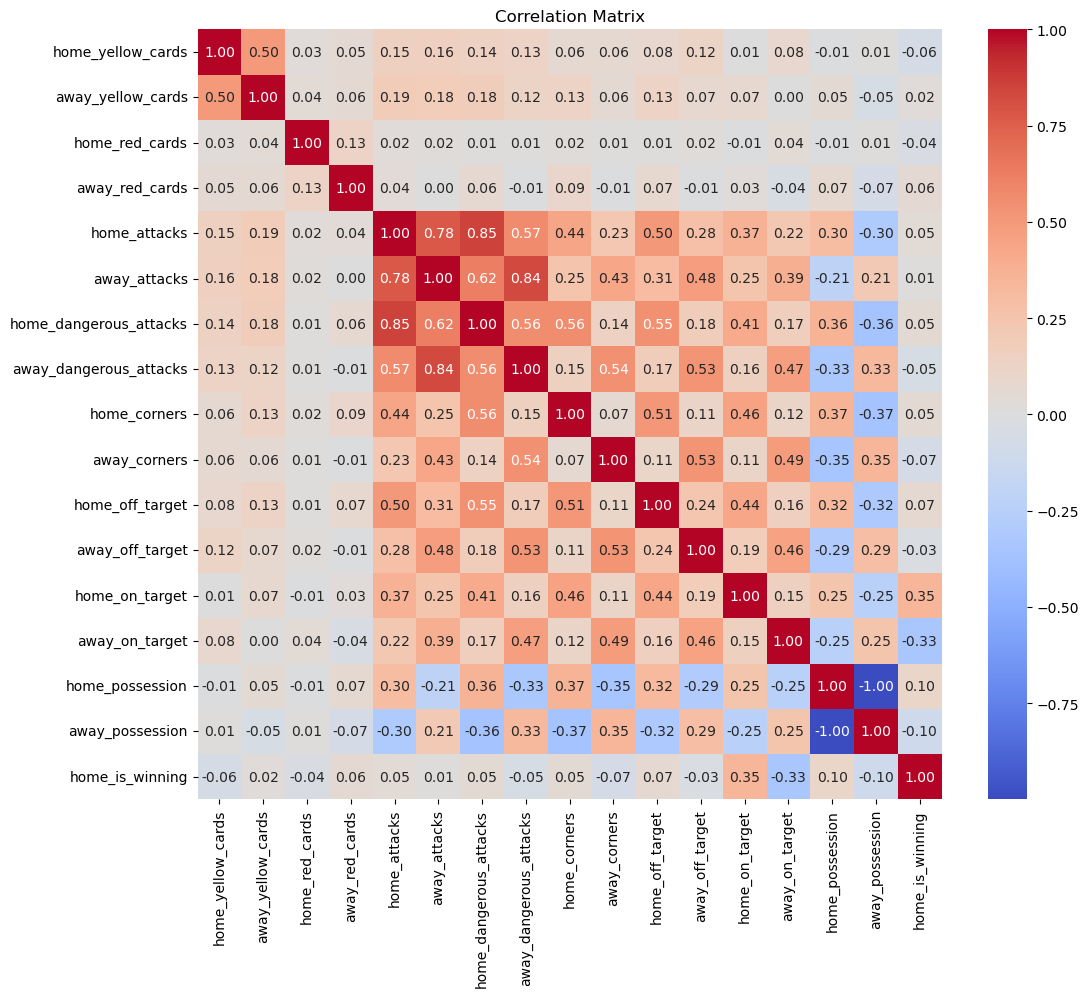

In [23]:
correlation_matrix = df[df_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix above, we can observe that almost all of the correlation coefficients are low especially with the target variable `home_is_winning`. These low correlation coefficients suggest that the features in the dataset have weak linear relationships with each other and may not necessarily affect the `home_is_winning`. There is also a perfect negative relationship between `home_possession`,  `away_possession`, this means that any increase in one of these would correspond to a decrease in the other in a consistent ratio.

We used a correlation matrix with a heatmap as well for the paired features. The features included in the correlation matrix were the following:  `yellow_cards_difference`, `red_cards_difference`, `attacks_difference`,`dangerous_attacks_difference`,`corners_difference`, `off_target_difference`, `on_target_difference`, `home_possession`, and `home_is_winning`.

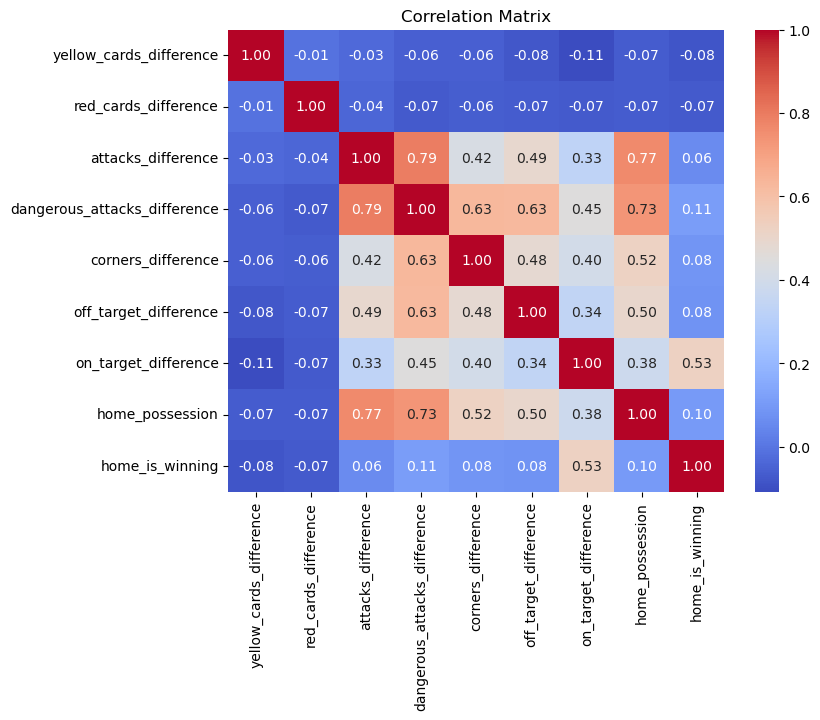

In [24]:
correlation_matrix = df_pair[df_pair_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A positive correlation of 0.53 between `home_is_winning` and `on_target_difference` indicates that an increase in the difference in on-target attempts is moderately associated with an increased likelihood of the home team winning.

A strong negative correlation of -0.79 between `attacks_difference` and `dangerous_attacks_difference` suggests a significant negative relationship. As the difference in total attacks increases, the difference in dangerous attacks tends to decrease, and vice versa.

A positive correlation of 0.33 between `attacks_difference` and `on_target_difference` indicates a weak positive relationship. An increase in the difference in total attacks is weakly associated with a slight increase in the difference in on-target attempts.

A moderate positive correlation of 0.45 between `dangerous_attacks_difference` and `on_target_difference` suggests a moderate positive relationship. An increase in the difference in dangerous attacks is moderately associated with an increase in the difference in on-target attempts.

#### 2. How many matches in the dataset resulted in the home team winning?

For the second exploratory question, we wanted to determine how many matches resulted in the home team winning. 

We used a bar graph which is useful in comparing different groups. In this case, we compared the amount of matches that were won when the `home_is_winning` was 0 and 1. The 0 represents that the away team was winning while 1 represents that the home team was winning.

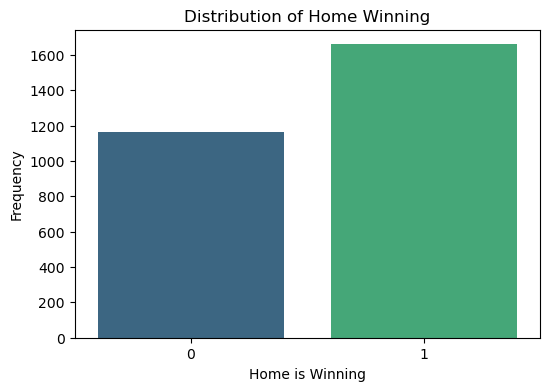

Is the home team winning?
 home_is_winning
1    1659
0    1165
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='home_is_winning', data=df, palette='viridis')
plt.title('Distribution of Home Winning')
plt.xlabel('Home is Winning')
plt.ylabel('Frequency')

plt.show()

print("Is the home team winning?\n", df['home_is_winning'].value_counts())

In exploring the distribution of the home team winning, it was found that the home team wins more than the away team, being 494 more wins. This may indicate a class imbalance. However, it is also worth noting that being the Home team has inherent advantages which may not be found in the data such as being more familiar with the playing environment, crowd support, and reduced travel-related fatigue. Therefore, the apparent class imbalance may be a reflection of these inherent advantages rather than a data-related issue. Considering these factors is crucial in interpreting the results accurately and deciding on an appropriate strategy for modeling

#### 3. How does possession percentage vary between home and away teams, and how does it relate to home team winning?

For the third exploratory question, we wanted to determine how the possession of the soccer ball differ between the two teams which are the home and away. We also wanted to determine if having possession of the soccer ball would relate to the home team winning. 

We used a Kernel Density Estimation (KDE) plot which shows the distribution of the different features. The x-axis represents the values of the features. On the other hand, the y-axis indicates the probability density estimate of observing data points at specific values along the x-axis. The blue color represents the home team winning, while the red color represents the away team winning. The features that were plotted were the following: `attacks_difference`, `dangerous_attacks_difference`, and `on_target_difference`. 

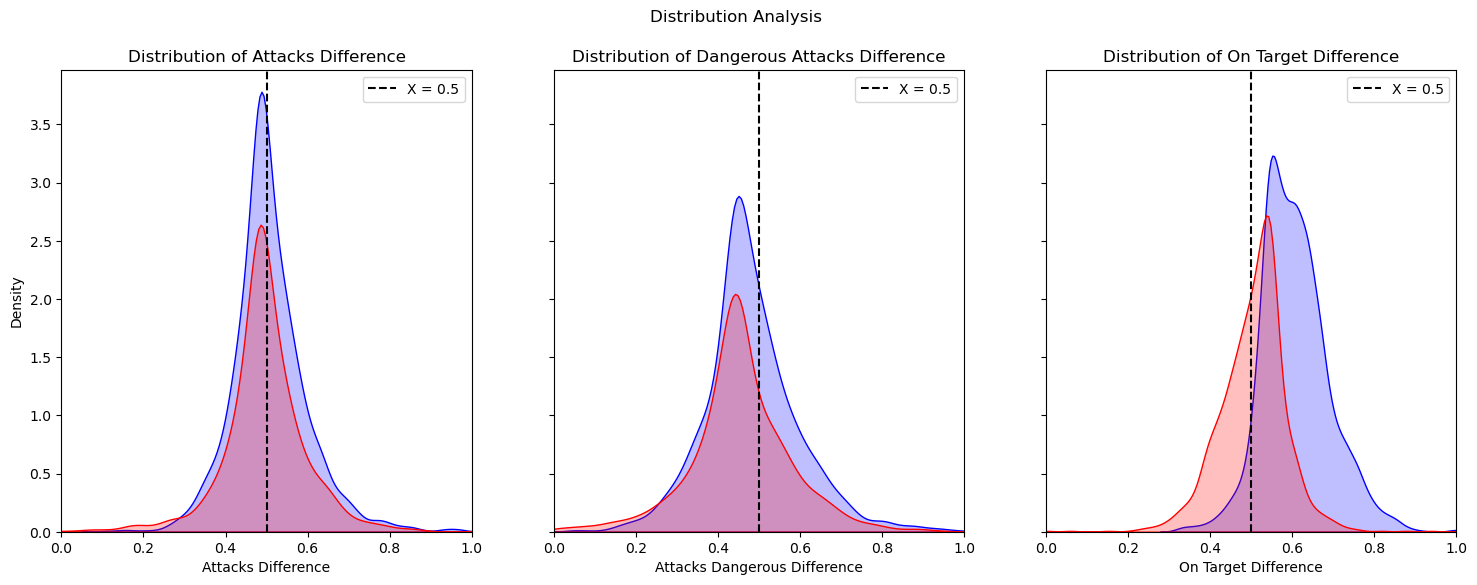

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for 'attacks_difference'
sns.kdeplot(data=df_pair, x='attacks_difference', fill=True, hue='home_is_winning', ax=axes[0], palette={True: 'blue', False: 'red'})
axes[0].set_title('Distribution of Attacks Difference')
axes[0].set_xlabel('Attacks Difference')
axes[0].set_ylabel('Density')
axes[0].set_xlim(left=min(df_pair['attacks_difference']), right=max(df_pair['attacks_difference']))
axes[0].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[0].legend()

# Plot for 'dangerous_attacks_difference'
sns.kdeplot(data=df_pair, x='dangerous_attacks_difference', fill=True, hue='home_is_winning', ax=axes[1], palette={True: 'blue', False: 'red'})
axes[1].set_title('Distribution of Dangerous Attacks Difference')
axes[1].set_xlabel('Attacks Dangerous Difference')
axes[1].set_ylabel('')
axes[1].set_xlim(left=min(df_pair['dangerous_attacks_difference']), right=max(df_pair['dangerous_attacks_difference']))
axes[1].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[1].legend()

# Plot for 'on_target_difference'
sns.kdeplot(data=df_pair, x='on_target_difference', fill=True, hue='home_is_winning', ax=axes[2], palette={True: 'blue', False: 'red'})
axes[2].set_title('Distribution of On Target Difference')
axes[2].set_xlabel('On Target Difference')
axes[2].set_ylabel('')
axes[2].set_xlim(left=min(df_pair['on_target_difference']), right=max(df_pair['on_target_difference']))
axes[2].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[2].legend()

plt.suptitle('Distribution Analysis')
plt.show()


For the first KDE plot (leftmost), the distribution analysis reveals symmetrical triangular curves for both winning and losing instances in `attacks_difference`, with peaks close to each other on the x-axis, indicating a balanced representation of attack differences. This may indicate that this feature may not be the strongest indicator of winning or losing.

For the second KDE plot (center), the distribution analysis indicates that, on average, the away team tends to execute more dangerous attacks in `dangerous_attacks_difference`. The peaks are centered around 0.45 on the x-axis, with 0.5 indicating an equal proportion of dangerous attacks between the home and away teams. The leftward shift of the peak suggests that values below 0.5 represent a higher proportion of dangerous attacks by the away team.

For the third KDE plot (rightmost), `on_target_difference` presents a distinct asymmetry, with a substantial portion of losing instances clustering before x = 0.5, while most winning instances concentrate above x = 0.5. This implies that the home team's advantage in on-target attempts becomes more pronounced when the difference surpasses the 0.5 threshold, serving as a potential influential factor in match outcomes.


# Model training

For this project, we will be exploring 3 types of machine learning models: k-nearest neighbor, binomial classification, and naive bayes.

## Post-EDA pre-processing

With the EDA completed, there are still some pre-processing steps that need to be performed in order to use the different learning models. The `current_minute` column needs to be dropped, since this is not a feature used in the learning models.

We will also separate the data, depending on whether or not the home team is winning.

In [27]:
df_win = df[df["home_is_winning"] == True]
df_lose = df[df["home_is_winning"] == False]
print(len(df_win))
print(len(df_lose))

1659
1165


As shown, there are 1659 winning games and 1165 losing games.

In [28]:
# We will now separate the labels (y) used in the dataset and move this to a separate dataframe.

df_win_y = df_win.pop('home_is_winning')
df_lose_y = df_lose.pop('home_is_winning')

In [29]:
df_win_y.head()

1     1
4     1
5     1
11    1
14    1
Name: home_is_winning, dtype: int64

In [30]:
df_lose_y.head()

0     0
8     0
12    0
20    0
21    0
Name: home_is_winning, dtype: int64

To further simplify the process of creating the machine learning models, we will also change the True/False into 0/1. The True/False was only kept so that the data would be easier to visualize during the EDA.

In [31]:
df_win_y = df_win_y.astype(int)
df_lose_y = df_lose_y.astype(int)

We will now convert these into numpy arrays and into the data that will be used for training and testing. 

80% of the data will be used for training, while the remaining 20% will be used for testing.

In [32]:
df

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,home_is_winning
0,0.000000,0.000,0.0,0.0,0.152941,0.245902,0.219697,0.185714,0.285714,0.055556,0.166667,0.000000,0.181818,0.315789,0.462687,0.537313,0
1,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492537,0.507463,1
4,0.142857,0.000,0.0,0.0,0.270588,0.426230,0.159091,0.328571,0.071429,0.055556,0.000000,0.166667,0.181818,0.210526,0.417910,0.582090,1
5,0.000000,0.000,0.0,0.0,0.341176,0.393443,0.303030,0.250000,0.214286,0.111111,0.166667,0.222222,0.136364,0.157895,0.492537,0.507463,1
8,0.000000,0.000,0.0,0.0,0.105882,0.224044,0.151515,0.221429,0.142857,0.111111,0.041667,0.166667,0.045455,0.210526,0.283582,0.716418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,0.000000,0.125,0.0,0.0,0.415686,0.415301,0.522727,0.200000,0.214286,0.000000,0.291667,0.333333,0.363636,0.000000,0.641791,0.358209,1
6994,0.142857,0.250,0.0,0.0,0.309804,0.333333,0.462121,0.250000,0.285714,0.222222,0.125000,0.055556,0.136364,0.157895,0.537313,0.462687,1
6996,0.000000,0.125,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492537,0.507463,1
6997,0.000000,0.000,0.0,0.0,0.278431,0.327869,0.553030,0.285714,0.500000,0.000000,0.208333,0.277778,0.318182,0.000000,0.656716,0.343284,1


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_df = df.values[:,:-1]
y_df = df.values[:,-1]
print("X shape: ", X_df.shape)
print("y shape: ", y_df.shape)

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, stratify = y_df, test_size = 0.2, random_state = 42)
print('Training data shape: ', X_train_df.shape)
print('Training labels shape: ', y_train_df.shape)
print('Test data shape: ', X_test_df.shape)
print('Test labels shape: ', y_test_df.shape)

X shape:  (2824, 16)
y shape:  (2824,)
Training data shape:  (2259, 16)
Training labels shape:  (2259,)
Test data shape:  (565, 16)
Test labels shape:  (565,)


In [35]:
# X_test_df, X_val_df, y_test_df, y_val_df = train_test_split(X_test_df, y_test_df, stratify = y_test_df, test_size = 0.50, random_state = 42)
# print('Test data shape: ', X_test_df.shape)
# print('Test labels shape: ', y_test_df.shape)
# print('Validation data shape: ', X_val_df.shape)
# print('Validation labels shape: ', y_val_df.shape)

In [36]:
X_df_pair = df_pair.values[:,:-1]
y_df_pair = df_pair.values[:,-1]
print("X shape: ", X_df_pair.shape)
print("y shape: ", y_df_pair.shape)

X_train_df_pair, X_test_df_pair, y_train_df_pair, y_test_df_pair = train_test_split(X_df_pair, y_df_pair, stratify = y_df_pair, test_size = 0.2, random_state = 42)
print('Training data shape: ', X_train_df_pair.shape)
print('Training labels shape: ', y_train_df_pair.shape)
print('Test data shape: ', X_test_df_pair.shape)
print('Test labels shape: ', y_test_df_pair.shape)

X shape:  (2824, 8)
y shape:  (2824,)
Training data shape:  (2259, 8)
Training labels shape:  (2259,)
Test data shape:  (565, 8)
Test labels shape:  (565,)


In [37]:
# X_test_df_pair, X_val_df_pair, y_test_df_pair, y_val_df_pair = train_test_split(X_test_df_pair, y_test_df_pair, stratify = y_test_df_pair, test_size = 0.50, random_state = 42)
# print('Training data shape: ', X_test_df_pair.shape)
# print('Training labels shape: ', y_test_df_pair.shape)
# print('Validation data shape: ', X_val_df_pair.shape)
# print('Validation labels shape: ', y_val_df_pair.shape)

## K-nearest Neighbor Model Training and Hyperparameter Tuning

The first model that the group used to classify the data is the K-nearest Neighbor model.

The K-nearest Neighbor (KNN) model was chosen since it doesn't involve a training phase and can be relatively fast for making prediction, which in this case is a classification type of task to determine if the home team is winning or not. KNN does not make strong assumptions about the underlying data distribution. Furthermore, the model is simple to understand and offers an intuitive way to explain predictions based on the nearest neighbors.

We will first be training a K-nearest Neighbor model on the regular dataset then on the paired dataset.

### Regular Dataset

Using the sklearn library, the KNeighborsClassifier, cross_val_score, accuracy_score and classification_report are imported.

In `knnModel` a `KNeighborsClassifier` model is initialized. We did not specify the number of neighbors, `n_neighbors` parameter. Since the `n_neighbors` parameter was not specified, the default number of neighbors used will be 5.

In [38]:
knnModel = KNeighborsClassifier()

Next, the model is trained using the training data of the regular dataset.

In [39]:
knnModel.fit(X_train_df, y_train_df)

KNeighborsClassifier()

Afterwards, the training prediction of the `knnModel` is taken. The accuracy of the model is also calculated using the accuracy_score function.

In [40]:
predictions = knnModel.predict(X_train_df)

print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df, predictions) * 100))
print(classification_report(y_train_df, predictions))

Train accuracy: 78.71%
              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       932
         1.0       0.78      0.89      0.83      1327

    accuracy                           0.79      2259
   macro avg       0.79      0.77      0.77      2259
weighted avg       0.79      0.79      0.78      2259



The model was able to achieve a training accuracy of 78.71%.

Now, we use our trained model to get the predictions on the test set and then compute its accuracy.

In [41]:
predictions = knnModel.predict(X_test_df)

print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df, predictions) * 100))
print(classification_report(y_test_df, predictions))

Test accuracy: 68.50%
              precision    recall  f1-score   support

         0.0       0.66      0.50      0.57       233
         1.0       0.70      0.82      0.75       332

    accuracy                           0.68       565
   macro avg       0.68      0.66      0.66       565
weighted avg       0.68      0.68      0.68       565



The model was able to achieve a test accuracy of 68.50% which is relatively lower than the training accuracy of the model. The model achieved a training accuracy higher than the test accuracy, indicating that the model has the potential to overfit the training data. It is important to note that the default value for the KNN model was used in the model without hyperparameter tuning. This likely contributed to the lower test accuracy compared to the training accuracy.

In order to improve the model, hyperparamter tuning is applied to find the best k hyperparameter. To start the hyperparameter tuning process, we declare the number of folds that will be used for cross validation which is 5.

In [42]:
k_folds = 5

A matrix called scores where each row corresponds to a hyperparameter k, and each column is the validation score for that fold will be created to determine the best value for the `n_neighbors` parameter. We declare the range of values that we want to explore as potential values for the best k. 

In [43]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50]

The scores matrix is set to 0s first. 

In [44]:
scores = np.zeros((len(k_choices), k_folds))

The next step is that we create KNN models with varying values for the hyperparameter k. These values were declared in `k_choices`. For each of the `kchoices`, which is the possible value for the best hyperparameter `n_neighbors`, a new `KNeighborsClassifier` model is created. For each model, the cross validation score will be added to the score matrix created. 

In [45]:
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    knnModel = KNeighborsClassifier(n_neighbors=k_choices[i])
    scores[i] = cross_val_score(knnModel, X_train_df, y_train_df, cv=k_folds)
    print("scores : " + str(scores[i]))
    print("scores average : " + str(scores[i].mean()))
    pass

k is : 1
scores : [0.62831858 0.65265487 0.63716814 0.65486726 0.64523282]
scores average : 0.643648333104409
k is : 3
scores : [0.66814159 0.64380531 0.63938053 0.67256637 0.66518847]
scores average : 0.6578164550752507
k is : 5
scores : [0.67920354 0.70575221 0.66150442 0.7079646  0.69179601]
scores average : 0.6892441575260484
k is : 8
scores : [0.68584071 0.70353982 0.66150442 0.69690265 0.67405765]
scores average : 0.684369052057375
k is : 10
scores : [0.70353982 0.71460177 0.67920354 0.6880531  0.67627494]
scores average : 0.6923346349312246
k is : 12
scores : [0.72123894 0.72787611 0.6880531  0.69911504 0.66962306]
scores average : 0.7011812491415341
k is : 15
scores : [0.71238938 0.72566372 0.69026549 0.72123894 0.6962306 ]
scores average : 0.7091576241587034
k is : 20
scores : [0.70575221 0.7079646  0.69247788 0.71681416 0.72505543]
scores average : 0.7096128563860056
k is : 50
scores : [0.70575221 0.72787611 0.69690265 0.71017699 0.67405765]
scores average : 0.702953122853835

In order to choose the best hyperparameter k, we used a scatter plot to visualize the results.

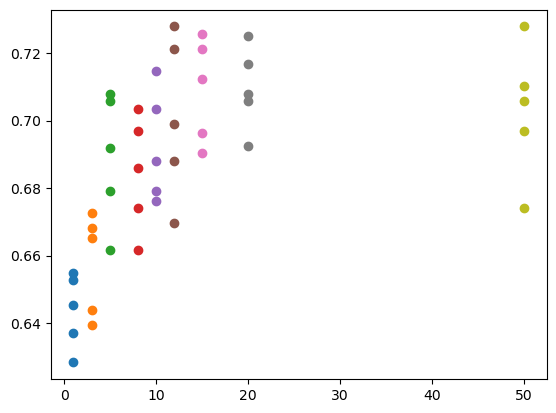

In [46]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

We solve the mean and standard deviation of the k_fold scores of each hyperparameter k. Then, a box-plot is created for each hyperparameter k.  

In [47]:
avg_scores = np.mean(scores,axis=1)
stddev_scores = np.std(scores, axis=1)

Text(0, 0.5, 'Cross-validation accuracy')

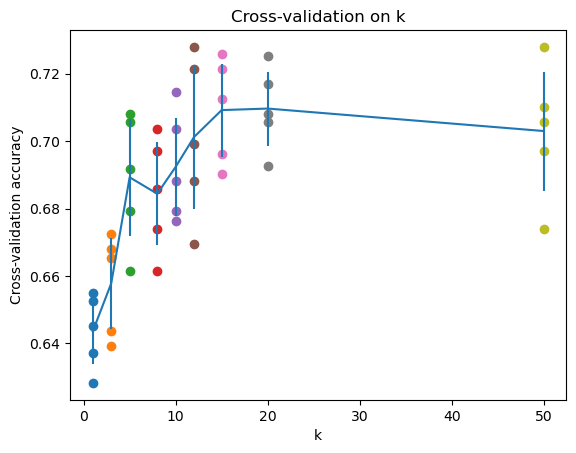

In [48]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Based on the graph and cross-validation results above, the best value for k is 20. This also aligns with the mean accuracy that was calculated previously for each of the k_choices.

Since the best value for k was determined, a new `KNeighborsClassifier` is instantiated with the value of 20. This is assigned to `knnModel`.

In [49]:
neighbors = 20
knnModel = KNeighborsClassifier(neighbors)

The KNN model is then retrained on the training data.

In [50]:
knnModel.fit(X_train_df, y_train_df)

KNeighborsClassifier(n_neighbors=20)

The classes of the train set are predicted using the trained model and its accuracy is printed.

In [51]:
prediction = knnModel.predict(X_train_df)

print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df, prediction) * 100))
print(classification_report(y_train_df, prediction))

Train accuracy: 75.03%
              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66       932
         1.0       0.75      0.87      0.80      1327

    accuracy                           0.75      2259
   macro avg       0.75      0.72      0.73      2259
weighted avg       0.75      0.75      0.74      2259



The model was able to achieve a train accuracy of 75.03%.

The classes of the test set are predicted using the trained model and its accuracy is printed.

In [52]:
prediction = knnModel.predict(X_test_df)

print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df, prediction) * 100))
print(classification_report(y_test_df, prediction))

Test accuracy: 69.73%
              precision    recall  f1-score   support

         0.0       0.68      0.50      0.58       233
         1.0       0.70      0.83      0.76       332

    accuracy                           0.70       565
   macro avg       0.69      0.67      0.67       565
weighted avg       0.69      0.70      0.69       565



The model was able to achieve a test accuracy of 69.56% which is lower than the training accuracy of the model. However, as compared to before the model used the best value for k, this model has improved and has a higher test accuracy. This means that the model has a better generalization to unseen data. The fact that the test accuracy slightly improved after tuning 'k' indicates that the initial model might have been overly sensitive to the 'k' parameter, and finding the optimal 'k' helped to solve this problem.

### Paired Dataset

In `knnModel` a `KNeighborsClassifier` model is initialized. We did not specify the number of neighbors, `n_neighbors` parameter. Since the `n_neighbors` parameter was not specified, the default number of neighbors used will be 5.

In [53]:
knnModel = KNeighborsClassifier()

Next, the model is trained using the training data of the paired dataset.

In [54]:
knnModel.fit(X_train_df_pair, y_train_df_pair)

KNeighborsClassifier()

Afterwards, the training prediction of the `knnModel` is taken. The accuracy of the model is also calculated using the accuracy_score function.

In [55]:
prediction = knnModel.predict(X_train_df_pair)

print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df_pair, prediction) * 100))
print(classification_report(y_train_df_pair, prediction))

Train accuracy: 80.08%
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       932
         1.0       0.84      0.82      0.83      1327

    accuracy                           0.80      2259
   macro avg       0.79      0.80      0.80      2259
weighted avg       0.80      0.80      0.80      2259



The model was able to achieve a training accuracy of 80.35%.

Now, we use our trained model to get the predictions on the test set and then compute its accuracy.

In [56]:
prediction = knnModel.predict(X_test_df_pair)

print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df_pair, prediction) * 100))
print(classification_report(y_test_df_pair, prediction))

Test accuracy: 70.80%
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       233
         1.0       0.76      0.74      0.75       332

    accuracy                           0.71       565
   macro avg       0.70      0.70      0.70       565
weighted avg       0.71      0.71      0.71       565



The model was able to achieve a test accuracy of 70.62% which is relatively lower than the training accuracy of the model. The model achieved a training accuracy higher than the test accuracy, indicating that the model has the potential to overfit the training data. It is important to note that the default value for the KNN model was used in the model without hyperparameter tuning. This likely contributed to the lower test accuracy compared to the training accuracy.

In order to improve the model, hyperparamter tuning is applied to find the best k hyperparameter. To start the hyperparameter tuning process, we declare the number of folds that will be used for cross validation which is 5.

In [57]:
k_folds = 5

A matrix called scores where each row corresponds to a hyperparameter k, and each column is the validation score for that fold will be created to determine the best value for the `n_neighbors` parameter. We declare the range of values that we want to explore as potential values for the best k. 

In [58]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50]

The scores matrix is set to 0s first. 

In [59]:
scores = np.zeros((len(k_choices), k_folds))

The next step is that we create KNN models with varying values for the hyperparameter k. These values were declared in `k_choices`. For each of the `kchoices`, which is the possible value for the best hyperparameter `n_neighbors`, a new `KNeighborsClassifier` model is created. For each model, the cross validation score will be added to the score matrix created. 

In [60]:
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    knnModel = KNeighborsClassifier(n_neighbors=k_choices[i])
    scores[i] = cross_val_score(knnModel, X_train_df_pair, y_train_df_pair, cv=k_folds)
    print("scores : " + str(scores[i]))
    print("scores average : " + str(scores[i].mean()))
    pass

k is : 1
scores : [0.67920354 0.71681416 0.6880531  0.65707965 0.6518847 ]
scores average : 0.6786070286286129
k is : 3
scores : [0.69026549 0.72566372 0.69247788 0.72123894 0.6940133 ]
scores average : 0.7047318642937033
k is : 5
scores : [0.71902655 0.72787611 0.71902655 0.71681416 0.70066519]
scores average : 0.716681710260385
k is : 8
scores : [0.71902655 0.75884956 0.72123894 0.72566372 0.68957871]
scores average : 0.7228714950061809
k is : 10
scores : [0.71902655 0.7699115  0.72123894 0.72787611 0.69844789]
scores average : 0.7273001981829955
k is : 12
scores : [0.72566372 0.7699115  0.72787611 0.74336283 0.72062084]
scores average : 0.7374870003728194
k is : 15
scores : [0.73893805 0.78539823 0.73672566 0.76106195 0.73170732]
scores average : 0.7507662421756962
k is : 20
scores : [0.74115044 0.78761062 0.70575221 0.76327434 0.71618625]
scores average : 0.7427947726782176
k is : 50
scores : [0.73672566 0.77654867 0.7079646  0.77654867 0.71840355]
scores average : 0.74323823165826

In order to choose the best hyperparameter k, we used a scatter plot to visualize the results.

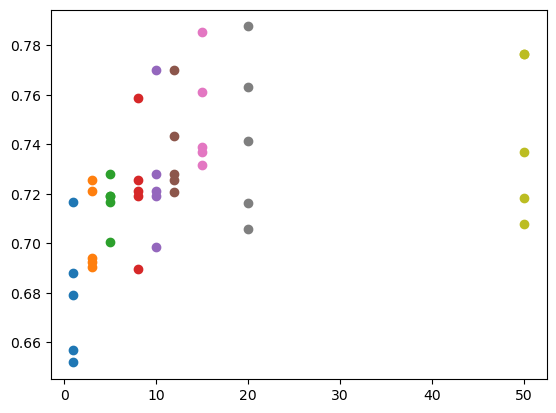

In [61]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

We solve the mean and standard deviation of the k_fold scores of each hyperparameter k. Then, a box-plot is created for each hyperparameter k.  

In [62]:
avg_scores = np.mean(scores,axis=1)
stddev_scores = np.std(scores, axis=1)

Text(0, 0.5, 'Cross-validation accuracy')

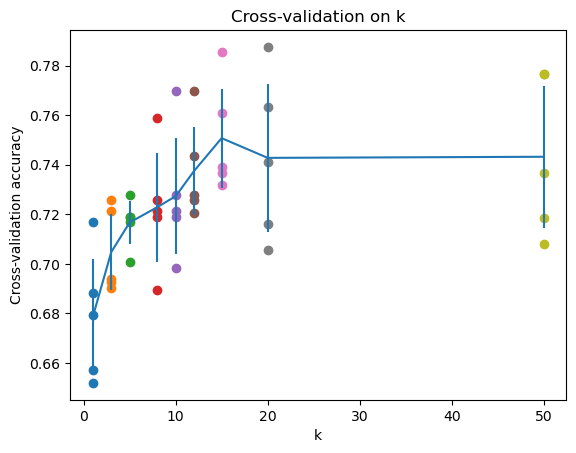

In [63]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Based on the graph and cross-validation results above, the best value for k is 15.  This also aligns with the mean accuracy that was calculated previously for each of the k_choices.

Since the best value for k was determined, a new `KNeighborsClassifier` is instantiated with the value of 15. This is assigned to `knnModel`.

In [64]:
neighbors = 15
knnModel = KNeighborsClassifier(neighbors)

The KNN model is then retrained on the training data.

In [65]:
knnModel.fit(X_train_df_pair, y_train_df_pair)

KNeighborsClassifier(n_neighbors=15)

The classes of the train set are predicted using the trained model and its accuracy is printed.

In [66]:
prediction = knnModel.predict(X_train_df_pair)

print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df_pair, prediction) * 100))
print(classification_report(y_train_df_pair, prediction))

Train accuracy: 77.69%
              precision    recall  f1-score   support

         0.0       0.79      0.62      0.70       932
         1.0       0.77      0.89      0.82      1327

    accuracy                           0.78      2259
   macro avg       0.78      0.75      0.76      2259
weighted avg       0.78      0.78      0.77      2259



The model was able to achieve a train accuracy of 77.73%.

The classes of the test set are predicted using the trained model and its accuracy is printed.

In [67]:
prediction = knnModel.predict(X_test_df_pair)

print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df_pair, prediction) * 100))
print(classification_report(y_test_df_pair, prediction))

Test accuracy: 71.86%
              precision    recall  f1-score   support

         0.0       0.71      0.54      0.61       233
         1.0       0.72      0.84      0.78       332

    accuracy                           0.72       565
   macro avg       0.72      0.69      0.70       565
weighted avg       0.72      0.72      0.71       565



The model was able to achieve a test accuracy of 71.86% which is lower than the training accuracy of the model. However, as compared to before the model used the best value for k, this model has improved and has a higher test accuracy. This means that the model has a better generalization to unseen data. The fact that the test accuracy slightly improved after using the optimal 'k' indicates that the initial model might have been overly sensitive to the 'k' parameter, and finding the optimal 'k' helped to solve this problem.

### Results

The summary of the training and test accuracies of the KNN model for the regular and paired dataframe are the following: <br>
 
Train accuracy for the regular dataframe: 78.71% <br>
Test accuracy for the regular dataframe: 68.50% <br>

Train accuracy with best k value for the regular dataframe: 75.03% <br>
Test accuracy with best k value for the regular dataframe: 69.56% <br>

Train accuracy for the paired dataframe: 80.35% <br>
Test accuracy for the paired dataframe: 70.62% <br>

Train accuracy with best k value for the paired dataframe: 77.73% <br>
Test accuracy with best k value  for the paired dataframe: 71.86% <br>

The model that used the paired dataframe demonstrated a slightly better performance overall. The models trained on the regular dataframe achieve lower train accuracies compared to those trained on the paired dataframe. This difference might indicate that the regular dataframe's larger feature space was more prone to overfitting, while the reduced feature space of the paired dataframe led to a slightly better generalization. The test accuracies of models trained on the paired dataframe are generally higher compared to those trained on the regular dataframe. This suggests that the feature engineering performed on the paired dataframe led to models that generalize better to unseen data. Furthermore, both the models trained on the regular and paired dataframe show an improvement in test accuracy after finding the best 'k', indicating that finding an optimal 'k' value helped both models to generalize better.

----

## Binomial Classification Model Training and Hyperparameter Tuning

### Regular Dataset

In [68]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
sgd_classifier = SGDClassifier(
    loss="log_loss", 
    eta0=0.001, 
    max_iter=200,
    learning_rate="constant", 
    random_state=42
    )

In [70]:
sgd_classifier.fit(X_train_df, y_train_df)

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=42)

In [71]:
predictions = sgd_classifier.predict(X_train_df)
print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df, predictions) * 100))
print(classification_report(y_train_df, predictions))

Train accuracy: 67.68%
              precision    recall  f1-score   support

         0.0       0.84      0.27      0.41       932
         1.0       0.65      0.96      0.78      1327

    accuracy                           0.68      2259
   macro avg       0.75      0.62      0.59      2259
weighted avg       0.73      0.68      0.62      2259



In [72]:
predictions = sgd_classifier.predict(X_test_df)
print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df, predictions) * 100))
print(classification_report(y_test_df, predictions))

Test accuracy: 65.31%
              precision    recall  f1-score   support

         0.0       0.74      0.24      0.37       233
         1.0       0.64      0.94      0.76       332

    accuracy                           0.65       565
   macro avg       0.69      0.59      0.56       565
weighted avg       0.68      0.65      0.60       565



In [73]:
# Hyperparemeters
param_grid = {
    'loss': ['log_loss'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.5],
    'max_iter': [200, 300, 400],
}

In [74]:
# Uncomment to see ALL possible outcomes

# # Search for the best hyperparemeters
# sgd_classifier = SGDClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train_df_pair, y_train_df_pair)
# best_params = grid_search.best_params_

# # Hyperparemeter performance
# for i in range(len(grid_search.cv_results_['params'])):
#     params = grid_search.cv_results_['params'][i]
#     val_accuracy = grid_search.cv_results_['mean_test_score'][i]
#     print("Cross validation accuracy for hyperparameters {}: {:.2f}%".format(params, val_accuracy * 100))

In [75]:
# Search for the best hyperparemeters
sgd_classifier = SGDClassifier(random_state=42)
grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_df, y_train_df)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.01, 0.1, 0.5],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log_loss'], 'max_iter': [200, 300, 400],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [76]:
# Get all hyperparameter sets
all_params = grid_search.cv_results_['params']

# Evaluate model performance for each hyperparameter set
all_accuracies_train = []
all_accuracies_test = []

In [77]:
for params in all_params:
    sgd_classifier.set_params(random_state = 42, **params)  # Set hyperparameters
    sgd_classifier.fit(X_train_df, y_train_df)

    predictions_train = sgd_classifier.predict(X_train_df)
    accuracy_train = accuracy_score(predictions_train, y_train_df)

    predictions_test = sgd_classifier.predict(X_test_df)
    accuracy_test = accuracy_score(predictions_test, y_test_df)

    all_accuracies_train.append((params, accuracy_train))
    all_accuracies_test.append((params, accuracy_test))
    
# Sort hyperparameter sets by better balance between train and test accuracies
sorted_hyperparameters = sorted(
    all_accuracies_test,
    key=lambda x: abs(x[1] - all_accuracies_train[all_accuracies_test.index(x)][1])
)

In [78]:
# Find the best hyperparameters
best_index = np.argmax(grid_search.cv_results_['mean_test_score'])
best_params = grid_search.cv_results_['params'][best_index]
best_accuracy = grid_search.cv_results_['mean_test_score'][best_index]

In [79]:
# Print the best hyperparameters and accuracy
best_params_str = ', '.join(f'{key}={value}' for key, value in best_params.items())
best_train_accuracy = all_accuracies_train[all_accuracies_test.index(sorted_hyperparameters[0])][1] * 100
best_test_accuracy = sorted_hyperparameters[0][1] * 100
best_hyperparameters_str = ""
best_average_accuracy = 0

print("\nBest GridSearch: {{{}}}, GridSearch Accuracy: {:.2f}%, Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(
    best_params_str, best_accuracy * 100, best_train_accuracy, best_test_accuracy
))
    
# Sort hyperparameter sets by better balance between train and test accuracies
sorted_hyperparameters = sorted(
    all_accuracies_test,
    key=lambda x: abs(x[1] - all_accuracies_train[all_accuracies_test.index(x)][1])
)

print("\nHyperparameter Sets with Test and Train Accuracies above 75%:")
for params, test_accuracy in sorted_hyperparameters:
    train_accuracy = all_accuracies_train[sorted_hyperparameters.index((params, test_accuracy))][1]
    grid_search_index = grid_search.cv_results_['params'].index(params)
    grid_search_accuracy = grid_search.cv_results_['mean_test_score'][grid_search_index]

    if test_accuracy > 0.75 and train_accuracy > 0.75 and grid_search_accuracy > 0.75:
        formatted_params = ', '.join(f'{key}={value}' for key, value in params.items())
        average_accuracy = (grid_search_accuracy + train_accuracy + test_accuracy) / 3
        result_str = "Hyperparameters: {{{}}}, GridSearch Accuracy: {:.2f}%, Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%, Average Accuracy: {:.2f}%".format(
            formatted_params, grid_search_accuracy * 100, train_accuracy * 100, test_accuracy * 100, average_accuracy * 100
        )

        if average_accuracy > best_average_accuracy:
            best_average_accuracy = average_accuracy
            best_hyperparameters_str = result_str

        print(result_str)
        
print("\nBest Hyperparameters Based on Highest Average Accuracy:")
print(best_hyperparameters_str)


Best GridSearch: {alpha=0.001, eta0=0.1, learning_rate=adaptive, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy: 77.60%, Train Accuracy: 59.81%, Test Accuracy: 59.82%

Hyperparameter Sets with Test and Train Accuracies above 75%:
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy: 76.01%, Train Accuracy: 76.14%, Test Accuracy: 75.75%, Average Accuracy: 75.97%
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=300, penalty=l1}, GridSearch Accuracy: 76.01%, Train Accuracy: 76.98%, Test Accuracy: 75.75%, Average Accuracy: 76.25%
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=400, penalty=l1}, GridSearch Accuracy: 76.01%, Train Accuracy: 76.32%, Test Accuracy: 75.75%, Average Accuracy: 76.02%
Hyperparameters: {alpha=0.0001, eta0=0.1, learning_rate=optimal, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy:

In [80]:
# Find the best hyperparameters
chosen_params = {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 300, 'penalty': 'l2'}

# Print the best hyperparameters and accuracy
print("Handpicked Hyperparameters: {}".format(chosen_params))

Handpicked Hyperparameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 300, 'penalty': 'l2'}


In [81]:
# Fit model with the best hyperparameters
sgd_classifier = SGDClassifier(random_state=42, **chosen_params)
sgd_classifier.fit(X_train_df, y_train_df)

SGDClassifier(eta0=0.1, loss='log_loss', max_iter=300, random_state=42)

In [82]:
# Train model accuracy
predictions = sgd_classifier.predict(X_train_df)
accuracy = accuracy_score(predictions, y_train_df)
print("Train accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_train_df, predictions))

Train accuracy with best hyperparameters: 75.92%
              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74       932
         1.0       0.86      0.71      0.78      1327

    accuracy                           0.76      2259
   macro avg       0.76      0.77      0.76      2259
weighted avg       0.78      0.76      0.76      2259



In [83]:
# Test model accuracy
predictions = sgd_classifier.predict(X_test_df)
accuracy = accuracy_score(predictions, y_test_df)
print("Test accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_df, predictions))

Test accuracy with best hyperparameters: 75.40%
              precision    recall  f1-score   support

         0.0       0.67      0.79      0.73       233
         1.0       0.83      0.73      0.78       332

    accuracy                           0.75       565
   macro avg       0.75      0.76      0.75       565
weighted avg       0.77      0.75      0.76       565



In [84]:
weights = sgd_classifier.coef_

df_fts = ['home_yellow_cards',
             'away_yellow_cards',
             'home_red_cards',
             'away_red_cards',
             'home_attacks',
             'away_attacks',
             'home_dangerous_attacks',
             'away_dangerous_attacks',
             'home_corners',
             'away_corners',
             'home_off_target',
             'away_off_target',
             'home_on_target',
             'away_on_target',
             'yellow_cards_difference',
             'red_cards_difference',
             'attacks_difference',
             'dangerous_attacks_difference',
             'corners_difference',
             'off_target_difference',
             'on_target_difference',
             'home_possesion',
             'away_possession',
           ]

# Combine feature names with their corresponding weights
feature_weights = list(zip(df_fts, weights[0]))

# Print the feature names and their corresponding weights
for feature, weight in feature_weights:
    print(f"Feature: {feature}, Weight: {weight}")

Feature: home_yellow_cards, Weight: -0.7205732070782802
Feature: away_yellow_cards, Weight: 0.6778213820916097
Feature: home_red_cards, Weight: -0.35172434239878647
Feature: away_red_cards, Weight: 1.0454230400341358
Feature: home_attacks, Weight: -0.8102895952086024
Feature: away_attacks, Weight: 1.302841693186661
Feature: home_dangerous_attacks, Weight: -0.9742606561207026
Feature: away_dangerous_attacks, Weight: 0.9125119477164941
Feature: home_corners, Weight: -1.8252089220120515
Feature: away_corners, Weight: 1.0390296928142162
Feature: home_off_target, Weight: -0.34983423220557414
Feature: away_off_target, Weight: 0.5208864046095293
Feature: home_on_target, Weight: 12.121127369191543
Feature: away_on_target, Weight: -11.753608549254917
Feature: yellow_cards_difference, Weight: 0.2588273676931594
Feature: red_cards_difference, Weight: -0.5020025606190497


### Paired Dataset

In [85]:
sgd_classifier = SGDClassifier(
    loss="log_loss", 
    eta0=0.001, 
    max_iter=200,
    learning_rate="constant", 
    random_state=42
    )

In [86]:
sgd_classifier.fit(X_train_df_pair, y_train_df_pair)

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=42)

In [87]:
predictions = sgd_classifier.predict(X_train_df_pair)
print("Train accuracy: {:.2f}%".format(accuracy_score(y_train_df_pair, predictions) * 100))
print(classification_report(y_train_df_pair, predictions))

Train accuracy: 59.54%
              precision    recall  f1-score   support

         0.0       0.82      0.02      0.05       932
         1.0       0.59      1.00      0.74      1327

    accuracy                           0.60      2259
   macro avg       0.71      0.51      0.40      2259
weighted avg       0.69      0.60      0.46      2259



In [88]:
predictions = sgd_classifier.predict(X_test_df_pair)
print("Test accuracy: {:.2f}%".format(accuracy_score(y_test_df_pair, predictions) * 100))
print(classification_report(y_test_df_pair, predictions))

Test accuracy: 60.18%
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.07       233
         1.0       0.60      1.00      0.75       332

    accuracy                           0.60       565
   macro avg       0.80      0.52      0.41       565
weighted avg       0.76      0.60      0.47       565



In [89]:
# Uncomment to see ALL possible outcomes

# # Search for the best hyperparemeters
# sgd_classifier = SGDClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train_df_pair, y_train_df_pair)
# best_params = grid_search.best_params_

# # Hyperparemeter performance
# for i in range(len(grid_search.cv_results_['params'])):
#     params = grid_search.cv_results_['params'][i]
#     val_accuracy = grid_search.cv_results_['mean_test_score'][i]
#     print("Cross validation accuracy for hyperparameters {}: {:.2f}%".format(params, val_accuracy * 100))

In [90]:
# Search for the best hyperparemeters
sgd_classifier = SGDClassifier(random_state=42)
grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_df_pair, y_train_df_pair)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.01, 0.1, 0.5],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['log_loss'], 'max_iter': [200, 300, 400],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [91]:
# Get all hyperparameter sets
all_params = grid_search.cv_results_['params']

# Evaluate model performance for each hyperparameter set
all_accuracies_train = []
all_accuracies_test = []

In [92]:
for params in all_params:
    sgd_classifier.set_params(random_state = 42, **params)  # Set hyperparameters
    sgd_classifier.fit(X_train_df_pair, y_train_df_pair)

    predictions_train = sgd_classifier.predict(X_train_df_pair)
    accuracy_train = accuracy_score(predictions_train, y_train_df_pair)

    predictions_test = sgd_classifier.predict(X_test_df_pair)
    accuracy_test = accuracy_score(predictions_test, y_test_df_pair)

    all_accuracies_train.append((params, accuracy_train))
    all_accuracies_test.append((params, accuracy_test))
    
# Sort hyperparameter sets by better balance between train and test accuracies
sorted_hyperparameters = sorted(
    all_accuracies_test,
    key=lambda x: abs(x[1] - all_accuracies_train[all_accuracies_test.index(x)][1])
)

In [93]:
# Find the best hyperparameters
best_index = np.argmax(grid_search.cv_results_['mean_test_score'])
best_params = grid_search.cv_results_['params'][best_index]
best_accuracy = grid_search.cv_results_['mean_test_score'][best_index]

In [94]:
# Print the best hyperparameters and accuracy
best_params_str = ', '.join(f'{key}={value}' for key, value in best_params.items())
best_train_accuracy = all_accuracies_train[all_accuracies_test.index(sorted_hyperparameters[0])][1] * 100
best_test_accuracy = sorted_hyperparameters[0][1] * 100
best_hyperparameters_str = ""
best_average_accuracy = 0

print("\nBest GridSearch: {{{}}}, GridSearch Accuracy: {:.2f}%, Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%".format(
    best_params_str, best_accuracy * 100, best_train_accuracy, best_test_accuracy
))
    
# Sort hyperparameter sets by better balance between train and test accuracies
sorted_hyperparameters = sorted(
    all_accuracies_test,
    key=lambda x: abs(x[1] - all_accuracies_train[all_accuracies_test.index(x)][1])
)

print("\nHyperparameter Sets with Test and Train Accuracies above 75%:")
for params, test_accuracy in sorted_hyperparameters:
    train_accuracy = all_accuracies_train[sorted_hyperparameters.index((params, test_accuracy))][1]
    grid_search_index = grid_search.cv_results_['params'].index(params)
    grid_search_accuracy = grid_search.cv_results_['mean_test_score'][grid_search_index]

    if test_accuracy > 0.75 and train_accuracy > 0.75 and grid_search_accuracy > 0.75:
        formatted_params = ', '.join(f'{key}={value}' for key, value in params.items())
        average_accuracy = (grid_search_accuracy + train_accuracy + test_accuracy) / 3
        result_str = "Hyperparameters: {{{}}}, GridSearch Accuracy: {:.2f}%, Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%, Average Accuracy: {:.2f}%".format(
            formatted_params, grid_search_accuracy * 100, train_accuracy * 100, test_accuracy * 100, average_accuracy * 100
        )

        if average_accuracy > best_average_accuracy:
            best_average_accuracy = average_accuracy
            best_hyperparameters_str = result_str

        print(result_str)
        
print("\nBest Hyperparameters Based on Highest Average Accuracy:")
print(best_hyperparameters_str)


Best GridSearch: {alpha=0.001, eta0=0.1, learning_rate=adaptive, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy: 77.60%, Train Accuracy: 75.56%, Test Accuracy: 75.58%

Hyperparameter Sets with Test and Train Accuracies above 75%:
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy: 75.70%, Train Accuracy: 76.45%, Test Accuracy: 75.58%, Average Accuracy: 75.91%
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=300, penalty=l1}, GridSearch Accuracy: 75.70%, Train Accuracy: 76.58%, Test Accuracy: 75.58%, Average Accuracy: 75.95%
Hyperparameters: {alpha=0.0001, eta0=0.01, learning_rate=optimal, loss=log_loss, max_iter=400, penalty=l1}, GridSearch Accuracy: 75.70%, Train Accuracy: 76.54%, Test Accuracy: 75.58%, Average Accuracy: 75.94%
Hyperparameters: {alpha=0.0001, eta0=0.1, learning_rate=optimal, loss=log_loss, max_iter=200, penalty=l1}, GridSearch Accuracy:

In [95]:
# Find the best hyperparameters
chosen_params = {'alpha': 0.0001, 'eta0': 0.5, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'max_iter': 300, 'penalty': 'l1'}

# Print the best hyperparameters and accuracy
print("Handpicked Hyperparameters: {}".format(chosen_params))

Handpicked Hyperparameters: {'alpha': 0.0001, 'eta0': 0.5, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'max_iter': 300, 'penalty': 'l1'}


In [96]:
# Fit model with the best hyperparameters
sgd_classifier = SGDClassifier(random_state=42, **chosen_params)
sgd_classifier.fit(X_train_df_pair, y_train_df_pair)

SGDClassifier(eta0=0.5, learning_rate='adaptive', loss='log_loss', max_iter=300,
              penalty='l1', random_state=42)

In [97]:
# Train model accuracy
predictions = sgd_classifier.predict(X_train_df_pair)
accuracy = accuracy_score(predictions, y_train_df_pair)
print("Train accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_train_df, predictions))

Train accuracy with best hyperparameters: 77.64%
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       932
         1.0       0.78      0.86      0.82      1327

    accuracy                           0.78      2259
   macro avg       0.78      0.76      0.76      2259
weighted avg       0.78      0.78      0.77      2259



In [98]:
# Test model accuracy
predictions = sgd_classifier.predict(X_test_df_pair)
accuracy = accuracy_score(predictions, y_test_df_pair)
print("Test accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_df, predictions))

Test accuracy with best hyperparameters: 76.11%
              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       233
         1.0       0.77      0.85      0.81       332

    accuracy                           0.76       565
   macro avg       0.76      0.74      0.75       565
weighted avg       0.76      0.76      0.76       565



In [99]:
weights = sgd_classifier.coef_

pair_fts = ['yellow_cards_difference',
            'red_cards_difference',
            'attacks_difference',
            'dangerous_attacks_difference',
            'corners_difference',
            'off_target_difference',
            'on_target_difference',
            'home_possession'
           ]

# Combine feature names with their corresponding weights
feature_weights = list(zip(pair_fts, weights[0]))

# Print the feature names and their corresponding weights
for feature, weight in feature_weights:
    print(f"Feature: {feature}, Weight: {weight}")

Feature: yellow_cards_difference, Weight: -1.0541568431057655
Feature: red_cards_difference, Weight: -1.0870123121019355
Feature: attacks_difference, Weight: -1.3457697455625466
Feature: dangerous_attacks_difference, Weight: -1.504170434804457
Feature: corners_difference, Weight: -3.808096101500425
Feature: off_target_difference, Weight: -0.6872212327674586
Feature: on_target_difference, Weight: 22.883770604351888
Feature: home_possession, Weight: 0.6716584473478708


### Results

The summary of the training and test accuracies of the Binomial Classification model for the regular and paired dataframe are the following: <br>

Train accuracy for the regular dataframe: 67.68% <br>
Test accuracy for the regular dataframe: 65.31% <br>

Train accuracy with the best hyperparameters for the regular dataframe: 75.92% <br>
Test accuracy with the best hyperparameters for the regular dataframe: 75.40% <br>

Train accuracy for the paired dataframe: 59.54% <br>
Test accuracy for the paired dataframe: 60.18% <br>

Train accuracy with the best hyperparameters for the paired dataframe: 77.64% <br>
Test accuracy with the best hyperparameters for the paired dataframe: 76.11% <br>

-----

## Naive Bayes Model Training and Hyperparameter Tuning

Another model that the group used to classify the data is the Naive Bayes model, specifically the Gaussian variant.

The Gaussian Naive Bayes model was chosen since the data is only being classified into two things—if home is winning or not. Based on the correlation matrix done in the EDA section, almost all of the correlation coefficients are low which indicates that each feature has small relationships with each other. Since the features were not treated independently, using Naive Bayes will allow us to treat the features independently. Through this, we may be able to get deeper insights.

We will first be training a GaussianNB model on the regular dataset then on the paired dataset.

FIX: Using the sklearn library, GaussianNB and GridSearchCV was imported. GridSearchCV will be used later on for tuning our hyperparameters.

### Regular Dataset

Using the sklearn library, GaussianNB and GridSearchCV was imported. GridSearchCV will be used later on for tuning our hyperparameters.

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In `nbModel` a `GaussianNB` model is initialized.

In [101]:
nbModel = GaussianNB()

Next, the model is then trained using the training data of the regular dataset.

In [102]:
nbModel.fit(X_train_df, y_train_df)

GaussianNB()

Afterwards, the training predictions of nbModel is taken. The accuracy of the model is then calculated using the `accuracy_score` function.

In [103]:
predictions = nbModel.predict(X_train_df)

training_accuracy = accuracy_score(predictions, y_train_df) * 100
print("Training accuracy: {:.2f}%".format(training_accuracy))
print(classification_report(y_train_df, predictions))

Training accuracy: 66.49%
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59       932
         1.0       0.71      0.73      0.72      1327

    accuracy                           0.66      2259
   macro avg       0.65      0.65      0.65      2259
weighted avg       0.66      0.66      0.66      2259



The model was able to achieve a training accuracy of 66.49%

Now, we use the test set to get predictions on our trained model and then compute its accuracy.

In [104]:
predictions = nbModel.predict(X_test_df)

test_accuracy = accuracy_score(predictions, y_test_df) * 100
print("Test accuracy: {:.2f}%".format(test_accuracy))
print(classification_report(y_test_df, predictions))

Test accuracy: 67.79%
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60       233
         1.0       0.72      0.73      0.73       332

    accuracy                           0.68       565
   macro avg       0.67      0.67      0.67       565
weighted avg       0.68      0.68      0.68       565



The model was able to achieve a test accuracy of 67.79% which is slightly higher than the training accuracy of the model.

To start the hyperparameter tuning process, in `param_grid`, we declare the hyperparameters and the range of values we want to explore.

In [105]:
param_grid = {
    'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                      1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 
                      1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

Grid Search is then implemented with `nbModel` as the estimator, `param_grid`, `'accuracy'` for scoring, and a cross validation of 5. The Grid Search is then trained.

In [106]:
grid_search = GridSearchCV(estimator=nbModel, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_df, y_train_df)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                           1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

`grid_search` now contains information about the best hyperparameters, the corresponding model with the best performance, and the best value used in `var_smoothing`.

In [107]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_var_smoothing = best_params['var_smoothing']

Now that we have the best parameters, we now initialize a `GaussianNB` model with it and train it.

In [108]:
nbModel = GaussianNB(var_smoothing=best_var_smoothing)
nbModel.fit(X_train_df, y_train_df)

GaussianNB(var_smoothing=1e-15)

Since we have trained the model, we now get its training prediction and accuracy.

In [109]:
predictions = nbModel.predict(X_train_df)

accuracy = accuracy_score(predictions, y_train_df)
print("Train accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_train_df, predictions))

Train accuracy with best hyperparameters: 66.49%
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59       932
         1.0       0.71      0.73      0.72      1327

    accuracy                           0.66      2259
   macro avg       0.65      0.65      0.65      2259
weighted avg       0.66      0.66      0.66      2259



The model achieved a training accuracy of 66.49%.

Afterwards, we get the test preditions and test its accuracy.

In [110]:
predictions = nbModel.predict(X_test_df)

accuracy = accuracy_score(predictions, y_test_df)
print("Test accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_df, predictions))

Test accuracy with best hyperparameters: 67.79%
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60       233
         1.0       0.72      0.73      0.73       332

    accuracy                           0.68       565
   macro avg       0.67      0.67      0.67       565
weighted avg       0.68      0.68      0.68       565



The model achieved a test accuracy of 67.79%.

Since the training accuracy and test accuracy of the model is the same before and after the hyperparameter tuning, we can infer that hyperparameter tuning did not help the model improve. We can also assume that the best hyperparameters used were the default hyperparameters of the model. Aside from this, since there is only a very small improvement in the accuracy result, there may be limitations in the model's ability to generalize data it has not yet seen.

Let us check the unique classes present in the model.

In [111]:
classes = nbModel.classes_
classes

array([0., 1.])

There are two classes, 0 and 1 which represent \"Away is Winning\" and \"Home is Winning\" respectively. Let us assign those in `class_labels` to keep track of it better. Let us also get the class priors of each class and the means and variances for each features in each class.

In [112]:
class_labels = ["Away is Winning", "Home is Winning"]
means_nb = nbModel.theta_
variances_nb = nbModel.var_
class_priors_nb = nbModel.class_prior_

# Print class priors
for class_idx, class_prior in enumerate(class_priors_nb):
    label = class_labels[class_idx]
    print(f"{label} - Class Prior: {class_prior:.4f}")
    
# print('\n')

# # Print means and variances for each feature and class
# for class_idx, (class_means, class_variances) in enumerate(zip(means_nb, variances_nb)):
#     label = class_labels[class_idx]

#     # Combine feature names with their corresponding means and variances
#     feature_stats = list(zip(df_fts, class_means, class_variances))

#     # Print the feature names, means, and variances
#     for feature, mean, variance in feature_stats:
#         print(f"{label} - Feature: {feature}, Mean: {mean:.4f}, Variance: {variance:.4f}")

Away is Winning - Class Prior: 0.4126
Home is Winning - Class Prior: 0.5874


The class priors indicate that "Away is Winning" has a probability of approximately 41.26%, and "Home is Winning" has a probability of approximately 58.74%. This indicates that the model has a higher chance of predicting "Home is Winning" as the classification this is because the home team has a home field advantage as they are more familiar with the field. 

-----

### Paired Dataset

In `nbModel` a `GaussianNB` model is initialized.

In [113]:
nbModel = GaussianNB()

Next, the model is then trained using the training data of the paired dataset.

In [114]:
nbModel.fit(X_train_df_pair, y_train_df_pair)

GaussianNB()

Afterwards, the training predictions of nbModel is taken. The accuracy of the model is then calculated using the `accuracy_score` function.

In [115]:
predictions = nbModel.predict(X_train_df_pair)

training_accuracy = accuracy_score(predictions, y_train_df_pair) * 100
print("Training accuracy: {:.2f}%".format(training_accuracy))
print(classification_report(y_train_df_pair, predictions))

Training accuracy: 70.69%
              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60       932
         1.0       0.72      0.83      0.77      1327

    accuracy                           0.71      2259
   macro avg       0.70      0.68      0.68      2259
weighted avg       0.70      0.71      0.70      2259



The model was able to achieve a training accuracy of 70.69%

Now, we use the test set to get predictions on our trained model and then compute its accuracy.

In [124]:
predictions = nbModel.predict(X_test_df_pair)

test_accuracy = accuracy_score(predictions, y_test_df_pair) * 100
print("Test accuracy: {:.2f}%".format(test_accuracy))
print(classification_report(y_test_df_pair, predictions))

Test accuracy: 67.08%
              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56       233
         1.0       0.69      0.79      0.74       332

    accuracy                           0.67       565
   macro avg       0.66      0.65      0.65       565
weighted avg       0.67      0.67      0.66       565



The model was able to achieve a test accuracy of 67.08% which is much lower than the training accuracy of the model. As the difference is 

To start the hyperparameter tuning process, in `param_grid`, we declare the hyperparameters and the range of values we want to explore.

In [117]:
param_grid = {
    'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                      1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 
                      1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

Grid Search is then implemented with `nbModel` as the estimator, `param_grid`, `'accuracy'` for scoring, and a cross validation of 5. The Grid Search is then trained.

In [118]:
grid_search = GridSearchCV(estimator=nbModel, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_df_pair, y_train_df_pair)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                           1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

`grid_search` now contains information about the best hyperparameters, the corresponding model with the best performance, and the best value used in `var_smoothing`.

In [119]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_var_smoothing = best_params['var_smoothing']

Now that we have the best parameters, we now initialize a `GaussianNB` model with it and train it.

In [120]:
nbModel = GaussianNB(var_smoothing=best_var_smoothing)
nbModel.fit(X_train_df_pair, y_train_df_pair)

GaussianNB(var_smoothing=1e-15)

Since we have trained the model, we now get its training prediction and accuracy.

In [125]:
predictions = nbModel.predict(X_train_df_pair)

accuracy = accuracy_score(predictions, y_train_df_pair)
print("Train accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_train_df_pair, predictions))

Train accuracy with best hyperparameters: 70.69%
              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60       932
         1.0       0.72      0.83      0.77      1327

    accuracy                           0.71      2259
   macro avg       0.70      0.68      0.68      2259
weighted avg       0.70      0.71      0.70      2259



The model still yielded a training accuracy of 70.69%.

Afterwards, we get the test preditions and test its accuracy.

In [126]:
predictions = nbModel.predict(X_test_df_pair)

accuracy = accuracy_score(predictions, y_test_df_pair)
print("Test accuracy with best hyperparameters: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_df_pair, predictions))

Test accuracy with best hyperparameters: 67.08%
              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56       233
         1.0       0.69      0.79      0.74       332

    accuracy                           0.67       565
   macro avg       0.66      0.65      0.65       565
weighted avg       0.67      0.67      0.66       565



The model still yielded a test accuracy of 67.08%.

Again, let us get the class priors of each class and the means and variances for each features in each class.

In [127]:
means_nb = nbModel.theta_
variances_nb = nbModel.var_

# Print class priors
for class_idx, class_prior in enumerate(class_priors_nb):
    label = class_labels[class_idx]
    print(f"{label} - Class Prior: {class_prior:.4f}")
    
# print('\n')

# # Print means and variances for each feature and class
# for class_idx, (class_means, class_variances) in enumerate(zip(means_nb, variances_nb)):
#     label = class_labels[class_idx]

#     # Combine feature names with their corresponding means and variances
#     feature_stats = list(zip(pair_fts, class_means, class_variances))

#     # Print the feature names, means, and variances
#     for feature, mean, variance in feature_stats:
#         print(f"{label} - Feature: {feature}, Mean: {mean:.4f}, Variance: {variance:.4f}")

Away is Winning - Class Prior: 0.4126
Home is Winning - Class Prior: 0.5874


The class priors indicate that "Away is Winning" has a probability of approximately 41.26%, and "Home is Winning" has a probability of approximately 58.74%. This indicates that the model has a higher chance of predicting "Home is Winning" as the classification this is because the home team has a home field advantage as they are more familiar with the field. 

### Results

The summary of the training and test accuracies of the Naive Bayes  model for the regular and paired dataframe are the following: <br>

Train accuracy for the regular dataframe: <br>
Test accuracy for the regular dataframe: <br>

Train accuracy with best var smoothing for the regular dataframe: <br>
Test accuracy with best var smoothing for the regular dataframe: <br>

Train accuracy for the paired dataframe: <br>
Test accuracy for the paired dataframe: <br>

Train accuracy with best var smoothing for the paired dataframe: <br>
Test accuracy with best var smoothing for the paired dataframe: <br>

-----

# Model selection

# Insights and conclusions

# Bibliography
